In [2]:
#importing the depencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
# calling the data
data = pd.read_csv('/Users/nisaaydin/winequality-red.csv')

In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# to know how many columns and rows we have
data.shape


(1599, 12)

In [6]:
#lets check missing values
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

DATA ANALYSIS AND VISULAIZATION

In [7]:
#statistical measures of dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


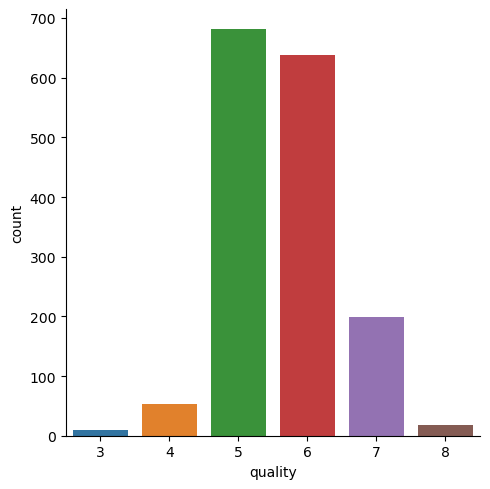

In [8]:
#number of values for each qualities
sns.catplot(x='quality',data = data,kind = 'count')

CORRELATION
1.Positive Corr - one value increases another one also increases
2.Negative Corr  - one value increases another one will decrease

In [15]:
correlation = data.corr()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

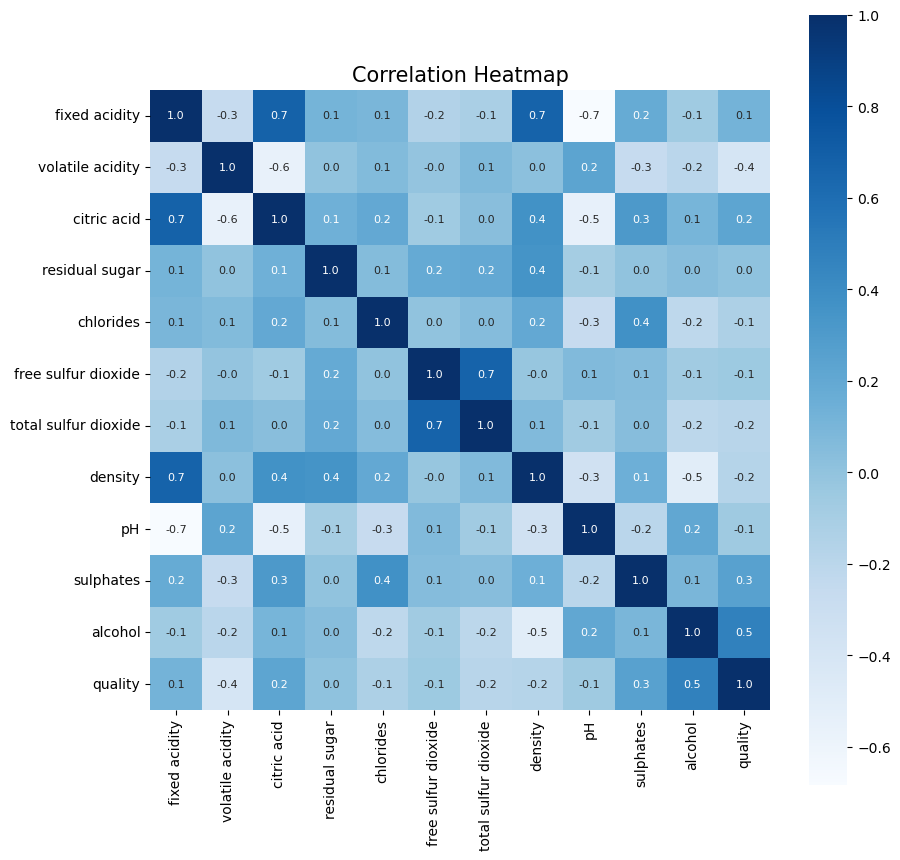

In [21]:
#constructing a heatmap the corr between the columns
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, 
            cbar=True, 
            square=True, 
            fmt='.1f', 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap='Blues')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

sns.heatmap Parameters that we used

cbar=True: Displays a color bar for the heatmap.
square=True: Makes each cell square-shaped.
fmt='.1f': Formats the correlation values with one decimal point.
annot=True: Displays the numerical correlation values in each cell.
annot_kws={'size': 8}: Sets the font size for annotations.
cmap='Blues': Sets the colormap for the heatmap.
plt.figure(figsize=(10, 10)):Sets the size of the entire plot, ensuring it's not too cramped.


DATA PREPROCESSING

In [22]:
#separate the data and label
X= data.drop('quality',axis=1)

In [24]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

LABEL BINARIZATION

In [26]:
Y= data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [27]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


TRAIN & TEST SPLIT


In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [49]:
model.fit(X_train,Y_train)

warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [36]:
print(X_train.shape)

(1279, 11)


In [37]:
print(Y_train.shape)

(1279,)


In [38]:
print(X_train.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


MODEL EVALUATION

ACCURACY SCORE

In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,Y_test)

In [41]:
print('Accuracy : ',test_data_accu)

Accuracy :  0.91875


BUILDING A PREDICTIVE SYSTEM

In [50]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Good Quality Wine
